## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
# Creat my project director as path
path = r"C:\Users\Poory\OneDrive\Desktop\project\Cancer Prediction"

In [3]:
# Import the main data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [4]:
df.head()

,State,Year,State_Year,Gender,Leading_Cancer_Sites,Incidence_Counts,Incidence_Age_Adjusted_Rate,Death_Counts,Mortality_Age_Adjusted_Rate,Mortality_Incidence_Age_Adjusted_Rate_Ratio,...,%_65_and_Over,%_Black,%_American_Indian_&_Alaska_Native,%_Asian,%_Native_Hawaiian/Other_Pacific_Islander,%_Hispanic,%_Non_Hispanic_White,%_Female,%_Rural,Region
0,Alabama,2010,Alabama2010,Male,Prostate,3872,151.08,544,27.67,0.183,...,15.01,28.46,0.63,0.51,0.02,2.91,67.47,51.42,69.98,South
1,Alabama,2011,Alabama2011,Male,Prostate,3817,146.45,544,26.61,0.182,...,15.01,28.46,0.63,0.51,0.02,2.91,67.47,51.42,69.98,South
2,Alabama,2012,Alabama2012,Male,Prostate,3412,127.56,461,22.07,0.173,...,15.38,28.29,0.78,0.65,0.11,3.38,65.86,51.30,66.70,South
3,Alabama,2013,Alabama2013,Male,Prostate,3318,120.95,470,22.13,0.183,...,16.03,28.31,0.78,0.65,0.11,3.32,65.89,51.31,67.09,South
4,Alabama,2014,Alabama2014,Male,Prostate,3103,109.17,467,21.30,0.195,...,16.49,28.28,0.79,0.72,0.11,3.47,65.60,51.24,67.09,South


In [5]:
df.isnull().sum()

State                                          0
Year                                           0
State_Year                                     0
Gender                                         0
Leading_Cancer_Sites                           0
Incidence_Counts                               0
Incidence_Age_Adjusted_Rate                    0
Death_Counts                                   0
Mortality_Age_Adjusted_Rate                    0
Mortality_Incidence_Age_Adjusted_Rate_Ratio    0
Population                                     0
%_Fair_or_Poor_Health                          0
Average_Number_of_Physically_Unhealthy_Days    0
Average_Number_of_Mentally_Unhealthy_Days      0
%_Low_birthweight                              0
%_Adult_smoking                                0
%_Adults_with_Obesity                          0
%_Physically_Inactive                          0
%_Excessive_Drinking                           0
%_Uninsured                                    0
Primary_Care_Physici

### Our data is alreaddy cleaned so we skip this step and go for prapration of data frame for regression analysis. 

#### In our previous exploratory data analysis (EDA), we found a strong correlation between lung cancer mortality rate and the percentage of adults who smoke, median household income, and the percentage of people with physically inactive days, among other variables. Therefore, I want to focus on separating the mortality rate of lung cancer from the percentage of adults who smoke.

In [6]:
l_df = df.loc[(df['Leading_Cancer_Sites']== 'Lung and Bronchus') & (df['Gender'] == 'Male & Female'), ['Mortality_Age_Adjusted_Rate','%_Adult_smoking']]
l_df

,Mortality_Age_Adjusted_Rate,%_Adult_smoking
1123,59.72,23.37
1126,56.86,22.76
1129,54.18,22.09
1132,54.78,22.43
1135,52.68,22.43
...,...,...
2791,30.28,16.90
2794,30.51,16.13
2797,29.51,16.13
2800,29.44,18.72


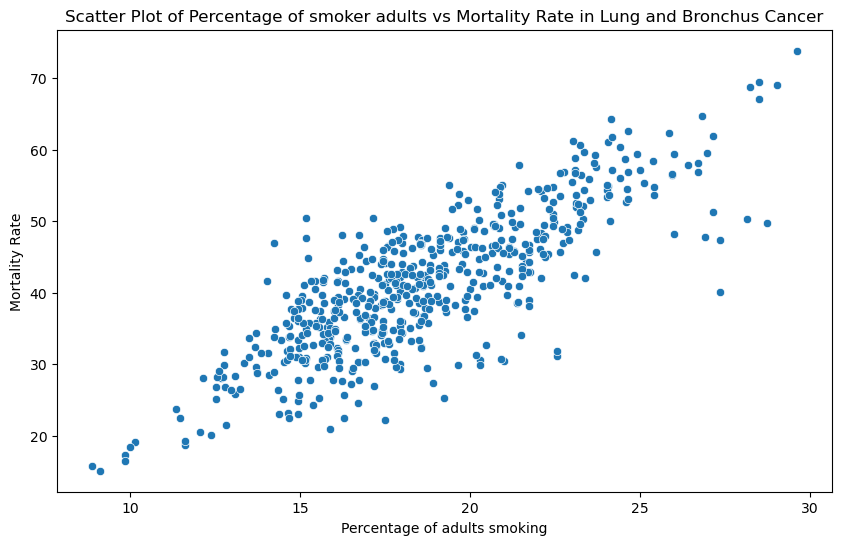

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Mortality_Age_Adjusted_Rate', x='%_Adult_smoking', data=l_df)
plt.ylabel('Mortality Rate')
plt.xlabel('Percentage of adults smoking')
plt.title('Scatter Plot of Percentage of smoker adults vs Mortality Rate in Lung and Bronchus Cancer')
plt.show()

#### Based on this scatter plot, we can clearly see a strong correlation between these two variables. I'm going to test the hypothesis that states if a state has a higher percentage of adults who smoke, it will have a higher rate of lung and bronchus cancer mortality..

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = l_df['%_Adult_smoking'].values.reshape(-1,1)
y = l_df['Mortality_Age_Adjusted_Rate'].values.reshape(-1,1)

In [9]:
X,y

(array([[23.37],
        [22.76],
        [22.09],
        [22.43],
        [22.43],
        [20.84],
        [20.12],
        [20.64],
        [20.64],
        [20.93],
        [19.99],
        [28.75],
        [28.14],
        [27.15],
        [27.37],
        [27.37],
        [23.39],
        [21.37],
        [22.55],
        [22.55],
        [21.01],
        [18.55],
        [19.09],
        [18.61],
        [18.38],
        [18.49],
        [18.49],
        [17.74],
        [17.51],
        [16.72],
        [16.72],
        [15.56],
        [14.49],
        [24.66],
        [24.06],
        [23.23],
        [24.43],
        [24.43],
        [23.1 ],
        [20.84],
        [20.91],
        [20.91],
        [22.29],
        [23.71],
        [14.83],
        [14.26],
        [14.45],
        [14.97],
        [14.97],
        [13.34],
        [12.68],
        [12.53],
        [12.53],
        [11.34],
        [11.47],
        [18.22],
        [17.48],
        [17.19],
        [17.95

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Regression analysis:

# Create a regression object.

lr = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [12]:
# Fit the regression object onto the training set.

lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X.

y_predicted = lr.predict(X_test)

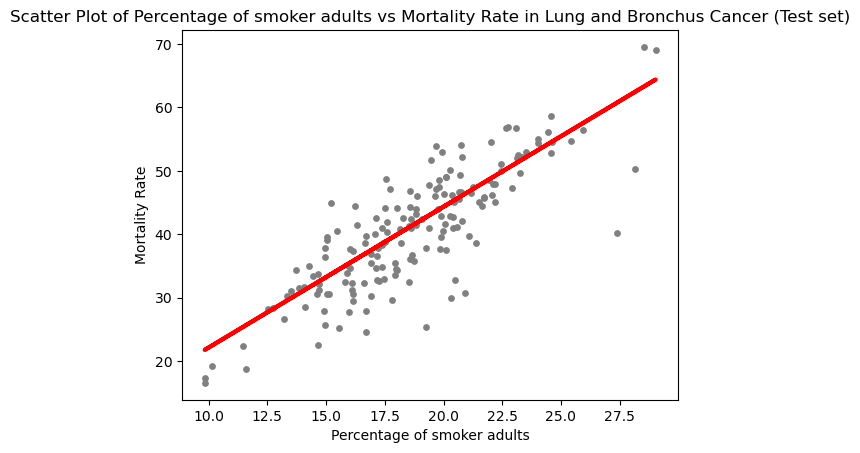

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Scatter Plot of Percentage of smoker adults vs Mortality Rate in Lung and Bronchus Cancer (Test set)')
plot_test.xlabel('Percentage of smoker adults')
plot_test.ylabel('Mortality Rate')
plot_test.show()

### The plot above shows that while our regression line almost fits our test data, there is a slight distance between the line and some of the data points for high and low percentages of smoker adults. Therefore, in addition to visual inspection, we need to use metrics such as root mean squared error and R-squared score to assess our model more accurately.

In [15]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [16]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,lr.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.22142833]]
Mean squared error:  28.48647496676685
R2 score:  0.6828832830566784


## Explanation of Results:

### Slope (2.22142833): This indicates that for each 1% increase in the percentage of adults who smoke, the mortality rate from lung and bronchus cancer increases by approximately 2.22 units.

### Mean Squared Error (28.486): This value measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model. Lower values indicate better fit, though 28.486 suggests there is some room for improvement.

### R2 Score (0.683): The R2 score indicates that approximately 68.3% of the variability in lung cancer mortality rates can be explained by the percentage of adults who smoke. This suggests a strong relationship, but there may be other factors influencing mortality rates.

In [17]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32.15,32.540932
1,46.08,41.782074
2,44.21,38.805360
3,30.59,32.385432
4,44.41,36.006360
5,52.46,51.423073
6,48.66,38.938645
7,46.20,45.114216
8,39.50,44.136788
9,46.10,43.514788


### When comparing the predicted values to the actual values, we can see that our model is not a perfect fit, and there are disparities between these two values.

#### Compare how the regression fits the training set

In [18]:
# Predict.

y_predicted_train = lr.predict(X_train) # This is predicting X_train!

In [19]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [20]:
print('Slope:' ,lr.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.22142833]]
Mean squared error:  33.4596917993871
R2 score:  0.655232188441287


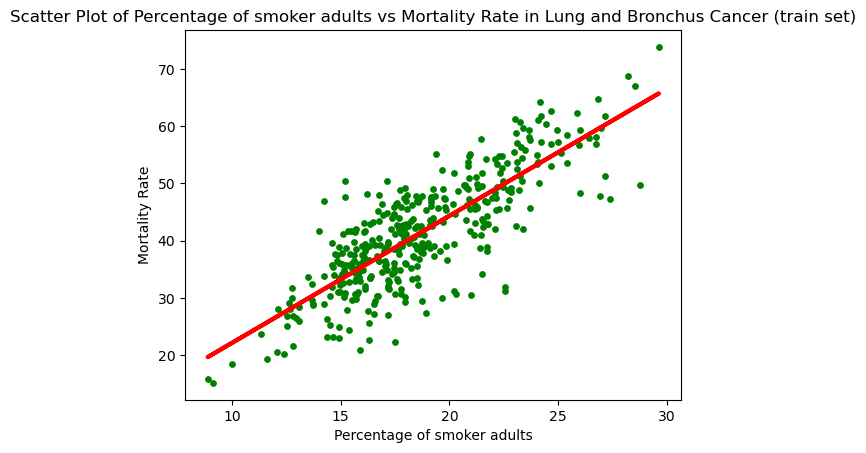

In [21]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Scatter Plot of Percentage of smoker adults vs Mortality Rate in Lung and Bronchus Cancer (train set)')
plot_test.xlabel('Percentage of smoker adults')
plot_test.ylabel('Mortality Rate')
plot_test.show()

### To assess if our model is overfitting, we need to compare the performance on both the training and test datasets:

### Training R2 score: 0.655
### Testing R2 score: 0.683

### While the test R2 score is slightly higher than the training R2 score, this difference isn't substantial. Overfitting usually manifests as a much higher training R2 compared to the testing R2. Given that our model's performance is quite consistent across both sets, it does not appear to be overfitting

### However we should consider that this regression model performed on a small subset of our main data frame which is related only to lung and bronchus cancer and has about 600 rows which limits our model accuracy. A small subset may not represent the entire population, leading to biased estimates.

### Now I want to check another predictor to see if I can make better models or not 

Slope: [-0.00056043]
Mean squared error: 54.29516935844938
R2 score: 0.3955761155804639


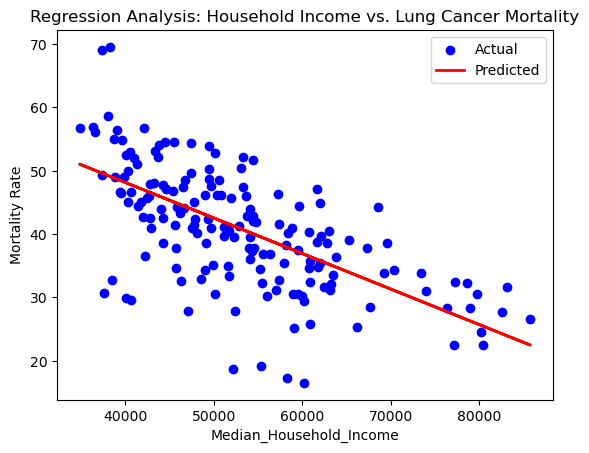

In [22]:

# Filter data for 'Lung and Bronchus' cancer
l_df = df.loc[(df['Leading_Cancer_Sites'] == 'Lung and Bronchus') & (df['Gender'] == 'Male & Female'), 
              ['Mortality_Age_Adjusted_Rate', 'Median_Household_Income']]

# Reshape data into NumPy arrays
X = l_df['Median_Household_Income'].values.reshape(-1, 1)
y = l_df['Mortality_Age_Adjusted_Rate'].values.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and train the regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the values for the test set
y_predicted = lr.predict(X_test)

# Calculate model performance metrics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Print model summary statistics
print('Slope:', lr.coef_[0])
print('Mean squared error:', rmse)
print('R2 score:', r2)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median_Household_Income')
plt.ylabel('Mortality Rate')
plt.title('Regression Analysis: Household Income vs. Lung Cancer Mortality')
plt.legend()
plt.show()


### Slope: The negative slope indicates a trend where higher median household incomes tend to be associated with slightly lower lung cancer mortality rates. However, the small magnitude of the slope (-0.00056043) suggests that income alone has a minimal direct impact on mortality rates compared to other influential factors.

### Mean Squared Error: The relatively high MSE of 54.30 suggests that the model does not predict lung cancer mortality rates with high precision, indicating that income alone might not capture enough of the variability in mortality rates.

### 2 Score: The R2 score of 0.396 indicates that while there is a statistically significant relationship between income and mortality rates, income explains less than half of the variability observed in the data. Therefore, other factors not included in our model are likely important contributors to lung cancer mortality rates.

#### Compare how the regression fits the training set

Slope: [[-0.00056043]]
Mean squared error:  58.522589635404024
R2 score:  0.3969847278833436


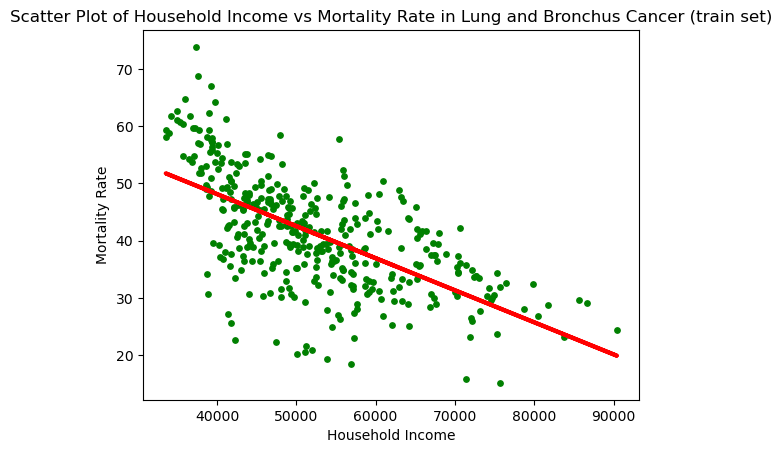

In [23]:
# Predict.

y_predicted_train = lr.predict(X_train) # This is predicting X_train!

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,lr.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Scatter Plot of Household Income vs Mortality Rate in Lung and Bronchus Cancer (train set)')
plot_test.xlabel('Household Income')
plot_test.ylabel('Mortality Rate')
plot_test.show()

### The slope of approximately -0.00056043 remains consistent with the previous analysis

### A higher MSE compared to the test set (54.30) suggests that the model's predictions deviate more from the actual values within the data it was trained on. This indicates that the model might not fit the training data as closely as desired

### The R2 score of 0.397 indicates that approximately 39.7% of the variance in lung cancer mortality rates in the training set can be explained by median household income. This is consistent with the R2 score from the test set (0.396), suggesting that the model's explanatory power is similar when applied to the training data.

### Now, with the assistance of chatGPT, I am planning to incorporate additional predictors into my model and create a new model using multiple regression.
##### Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

Coefficients: [[ 1.42416448e+00 -2.83580607e-01  8.18421676e-01 -5.39805618e-03
   1.45357845e-01 -4.85210569e-05]]
Mean squared error: 25.154670274985808
R2 score: 0.7199735501601578


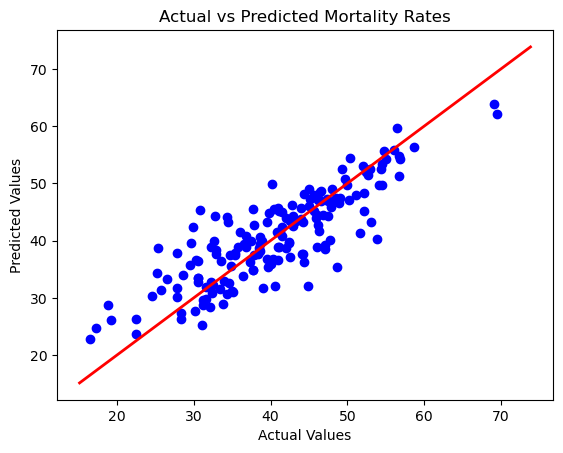

In [24]:

columns = ['Mortality_Age_Adjusted_Rate', '%_Adult_smoking', '%_Adults_with_Obesity', 
           '%_Physically_Inactive', 'Mental_Health_Provider_Rate', '%_Adults_with_Diabetes', 
           'Median_Household_Income']

# Filter data for 'Lung and Bronchus' cancer 
l_df = df.loc[(df['Leading_Cancer_Sites'] == 'Lung and Bronchus') & (df['Gender'] == 'Male & Female'), columns]

# Define the feature matrix (X) and target vector (y)
X = l_df.drop(columns=['Mortality_Age_Adjusted_Rate']).values
y = l_df['Mortality_Age_Adjusted_Rate'].values.reshape(-1, 1)

# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a regression object
lr = LinearRegression()

# Fit the regression object onto the training set
lr.fit(X_train, y_train)

# Predict the values of y using X
y_predicted = lr.predict(X_test)

# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)  # Mean squared error
r2 = r2_score(y_test, y_predicted)  # R2 score

# Print the model summary statistics
print('Coefficients:', lr.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

# Plotting Actual vs Predicted values
plt.scatter(y_test, y_predicted, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Mortality Rates')
plt.show()

# Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

# Further Refining the Model
## 1. Checking for Multicollinearity:
### Multicollinearity occurs when predictor variables in the regression model are highly correlated. This can be checked using the Variance Inflation Factor (VIF)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Adding a constant column to the predictor variables
X = sm.add_constant(X)

# Calculating VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = ['const'] + columns[1:]
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)

# Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

                      Variable         VIF
0                        const  205.894866
1              %_Adult_smoking    2.287109
2        %_Adults_with_Obesity    3.733275
3        %_Physically_Inactive    4.668544
4  Mental_Health_Provider_Rate    1.910209
5       %_Adults_with_Diabetes    3.757862
6      Median_Household_Income    2.363975


## The results we obtained from calculating the VIF (Variance Inflation Factor) provide insights into the multicollinearity among our predictor variables. Here's what each part means:

### Variance Inflation Factor (VIF): This metric assesses how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors in the model. A VIF value greater than 10 is often considered problematic, indicating high multicollinearity.

## Interpretation of VIF Results:

#### Constant (Intercept): VIF of 205.89 suggests very high multicollinearity, which is typical for an intercept because it's derived from a linear combination of other predictors.

#### Other Variables:

##### %_Adult_smoking: VIF = 2.29, indicating moderate multicollinearity.
##### %_Adults_with_Obesity: VIF = 3.73, indicating moderate multicollinearity.
##### %_Physically_Inactive: VIF = 4.67, indicating moderate multicollinearity.
##### Mental_Health_Provider_Rate: VIF = 1.91, indicating low multicollinearity.
##### %_Adults_with_Diabetes: VIF = 3.76, indicating moderate multicollinearity.
##### Median_Household_Income: VIF = 2.36, indicating moderate multicollinearity.

### The high VIF for the constant (intercept) is expected and typically not a concern.
### For the predictor variables, VIF values under 10 generally indicate acceptable levels of multicollinearity. In our case, most predictors fall within this range, except for %_Physically_Inactive which is close to 5, suggesting it might have a stronger correlation with other predictors.

### High multicollinearity can lead to inflated standard errors of coefficients, making some coefficients statistically insignificant when they should be significant.

#### Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

## 2. Exploring Non-linear Models:
### If the linear model does not fit well, we can explore non-linear models such as Polynomial Regression or other more complex models like Random Forest or Gradient Boosting.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Transforming the predictors to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fitting the polynomial regression model
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_train)

# Predicting and evaluating the model
y_predicted_poly = lr_poly.predict(poly.transform(X_test))
rmse_poly = mean_squared_error(y_test, y_predicted_poly)
r2_poly = r2_score(y_test, y_predicted_poly)

print('Polynomial Regression Mean squared error: ', rmse_poly)
print('Polynomial Regression R2 score: ', r2_poly)


# Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

Polynomial Regression Mean squared error:  31.488121945415255
Polynomial Regression R2 score:  0.649468392783231


### Mean Squared Error (MSE): This measures the average squared difference between the actual and predicted values. In our case, the MSE for the polynomial regression model is 31.49. Compared to the linear model's MSE of 25.15, the polynomial model has a higher MSE, indicating that it doesn't fit the data quite as closely as the linear model did.

### R-squared (R2) Score: This metric explains the proportion of the variance in the dependent variable (Mortality_Age_Adjusted_Rate) that is predictable from the independent variables (%_Adult_smoking, %_Adults_with_Obesity, etc.). An R2 score closer to 1 indicates a better fit. For our polynomial regression model, the R2 score is 0.649, which is lower than the linear model's R2 score of 0.720. This suggests that the linear model explains a larger proportion of the variance in the mortality rate compared to the polynomial model

#### Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

## 3. Using Cross-Validation for Robust Model Validation:

In [27]:
from sklearn.model_selection import cross_val_score

# Performing 10-fold cross-validation
cv_scores = cross_val_score(lr, X, y, cv=10, scoring='r2')

print('Cross-validated R2 scores:', cv_scores)
print('Mean cross-validated R2 score:', cv_scores.mean())

# Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

Cross-validated R2 scores: [0.74089502 0.63142636 0.80871408 0.54226327 0.76585346 0.38251767
 0.32735798 0.24256944 0.72760874 0.722296  ]
Mean cross-validated R2 score: 0.5891502027205412


## Interpretation:

### The cross-validated R2 scores indicate how well our linear regression model generalizes to unseen data.

### A higher R2 score (closer to 1) indicates better predictive performance, meaning the model explains a larger proportion of the variance in the data.

### In our results, the R2 scores range from 0.24 to 0.81 across folds, suggesting variability in how well the model performs on different subsets of the data.

### The mean cross-validated R2 score of 0.5891 indicates that, on average, our linear regression model explains approximately 58.91% of the variance in the mortality rates across different folds.

##### Citation: OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com